# Coursework
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:
- Make sure your notebook executes without errors.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.

Please rename the notebook filename to include your name in the filename.  And please also add your name below:

In [1]:
NAME = "Nisha Lad"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## AstroML

The data used is this coursework is obtained using [AstroML](http://www.astroml.org), a python package for machine learning for astronomy.  Although we take data from AstroML, this coursework is not based on standard AstroML examples.  So you will *not* find the solutions in AstroML examples!

## SDSS

The data obtained through AstroML was observed by the [Sloan Digital Sky Survey](https://www.sdss.org/) (SDSS), which began observations in 2000.  SDSS data have lead to many scientific advances and the experiment is widely seen as one of the most successful surveys in the history of astronomy.

---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [AstoML](http://www.astroml.org)
- [AstroPy](http://www.astropy.org/)

---

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

## Part 1: Regression

In these exercises we will consider the regression problem of the astonomical distance modulus vs redshift relationship.

In astronomy, the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) specifies the difference between the apparent and absolute magnitudes of an astronomnical object.  It provides a way of expressing astrophysical distances. 

Astronomical [redshift](https://en.wikipedia.org/wiki/Redshift) specifies the shift in wavelength that astronomical objects undergo due to the expansion of the Universe.  Due to Hubble's Law, more distance objects experience a greater redshift.


In [4]:
from astroML.datasets import generate_mu_z

In [5]:
# Load data
m = 150
z_sample, mu_sample, dmu = generate_mu_z(m, random_state=3)

Plot the distance modulus ($\mu$) vs redhift ($z$), including error bars.

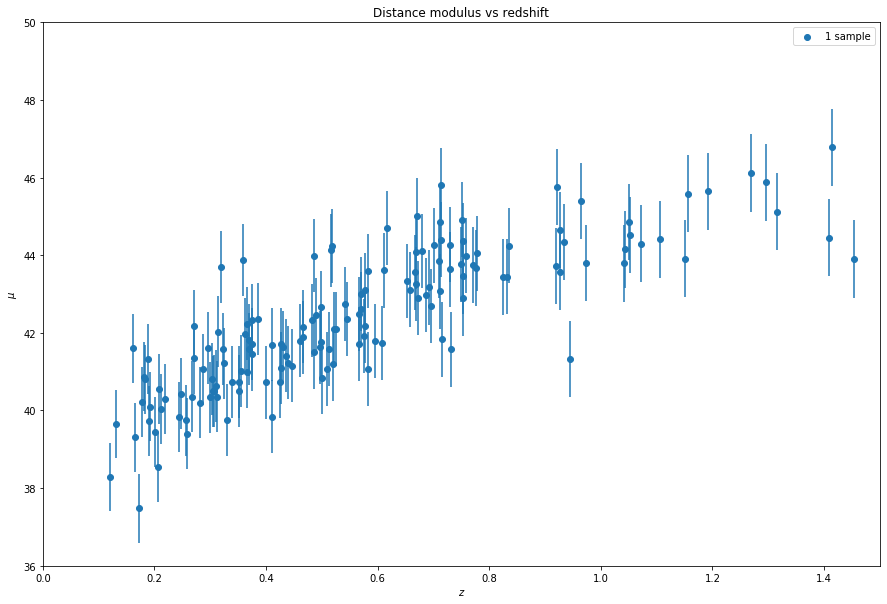

In [6]:
# Plot data
def plot_dist_mod():
    # YOUR CODE HERE
    plt.figure(figsize=(15,10))
    plt.scatter(z_sample, mu_sample, label='1 sample')
    plt.errorbar(z_sample, mu_sample, yerr=dmu, linestyle="None")
    plt.xlabel('$z$')
    plt.ylabel('$\mu$')
    plt.title('Distance modulus vs redshift')
    plt.ylim(36, 50)
    plt.xlim(0, 1.5)
    plt.legend()

plot_dist_mod()

Recall the normal equations for linear regression follow by analytically minimising the cost function: 

$$\min_\theta\ C(\theta) = \min_\theta \ (X \theta - y)^{\rm T}(X \theta - y).$$

Show analytically that the solution is given by 

$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y. $$

[Matrix calculus identities](https://en.wikipedia.org/wiki/Matrix_calculus) may be useful (note that we use the denominator layout convention).

Expand the cost function and drop terms that do not depend on $\theta$ (use latex mathematics expressions):

YOUR ANSWER HERE
___
> $ C(\theta) = (X \theta - y)^{\rm T}(X \theta - y)$
>
> In order to minimize the cost function with respect to $ \theta $, we need to find $ \frac{\partial C}{\partial \theta} = 0 $ and solve for $ \theta $
>
> $ C(\theta) = (X \theta - y)^{\rm T}(X \theta - y)$
>  
> $ C(\theta) = ((X \theta)^{\rm T} - y^{\rm T})(X \theta - y)$ (multiply out)
>
> $ C(\theta) = (X \theta)^{\rm T}(X \theta) - (X \theta)^{\rm T}y  - y^{\rm T}(X \theta) + y^{\rm T}y $
>
> Consider the second term: $ (X \theta)^{\rm T}y $
>
> $ dim[X] = m x n, dim[\theta] = n x 1, dim[X\theta] = m x 1, dim[(X\theta)^{\rm T}] = 1 x m, dim[y] = m x 1 $
>
> Hence by dimensional analysis and matrix multiplication: $ dim[(X \theta)^{\rm T}y] = 1$
>
> It's a scalar; the transpose of a scalar is still is scalar so let's transpose it:
>
> $ [(X \theta)^{\rm T}y]^{\rm T} = y^{\rm T}(X \theta) $
>
> Therefore we can now write $ C(\theta) $ in the following way:
>
> $ C(\theta) = (X \theta)^{\rm T}(X \theta) - 2y^{\rm T}(X \theta) + y^{\rm T}y $
>
> $ C(\theta) = \theta^{\rm T}X^{\rm T}X\theta - 2y^{\rm T}(X \theta) + y^{\rm T}y $
>
> Now each term is a scalar:
>
> $ dim[\theta^{\rm T}] = 1 x n, dim[X^{\rm T}] = n x m, dim[X] = m x n, dim[\theta] = n x 1 $
>
> Taking the derivative of the cost function with respect to $\theta$
>
> We can use the following properties to help us:
>
> $ \frac{\partial(AX)}{\partial X} = A^{\rm T}$, $\frac{\partial (X^{\rm T}A)}{\partial X} = A$, $\frac{\partial (X^{\rm T}X)}{\partial X} = 2X$, $\frac{\partial (X^{\rm T}AX)}{\partial X} = AX + A^{\rm T}X$
>
> Using the above we get:
>
> $\frac{\partial C(\theta)}{\partial \theta} = X^{\rm T}X\theta + (X^{\rm T}X)^{\rm T}\theta - 2X^{\rm T}y$
>
> $(X^{\rm T}X)^{\rm T}\theta = X^{\rm T}X $, substituting this into the above:
>
> **`Therefore:`** $\frac{\partial C(\theta)}{\partial \theta} = 2X^{\rm T}X\theta - 2X^{\rm T}y$
___

Set the derivative to zero and solve for $\theta$ (use latex mathematics expressions):

YOUR ANSWER HERE
___
>
> $\frac{\partial C(\theta)}{\partial \theta} = 2X^{\rm T}X\theta - 2X^{\rm T}y = 0$
>
> $2X^{\rm T}X\theta = 2X^{\rm T}y $
>
> $X^{\rm T}X\theta = X^{\rm T}y $
>
> **`Therefore:`** $\theta = (X^{\rm T}X)^{\rm -1}X^{\rm T}y $
___

Solve for $\theta$ by numerically implementing the analytic solution given above.

In [7]:
def compute_theta_lin_reg(X, y):
    # YOUR CODE HERE
    X_b = np.c_[np.ones((len(X), 1)), X] # add x0 = 1 to each instance
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

In [8]:
assert compute_theta_lin_reg(z_sample, mu_sample).shape == (2,)
theta = compute_theta_lin_reg(z_sample, mu_sample)
(theta_c, theta_m) = theta
print("Linear regression parameters recovered analytically: intercept={0:.4f}, slope={1:.4f}".format(theta_c, theta_m))

Linear regression parameters recovered analytically: intercept=39.5505, slope=4.9538


In [9]:
check_var_defined('theta_c')
check_var_defined('theta_m')

theta_c defined.
theta_m defined.


Write a method to make a prediction for a given redshift.

In [10]:
def predict_lin_reg(theta, x):
    # YOUR CODE HERE
    X_b = np.c_[np.ones((len(x), 1)), x] # add x0 = 1 to each instance 
    y = X_b.dot(theta)
    return y

Predict the distance modulus for a range of redshift values between 0.01 and 1.5 and plot the predicted curve overlayed on data (make a new plot; do not revise the plot above).  Call the variable used to store the predictions for your polynomial model `mu_pred_lin`.

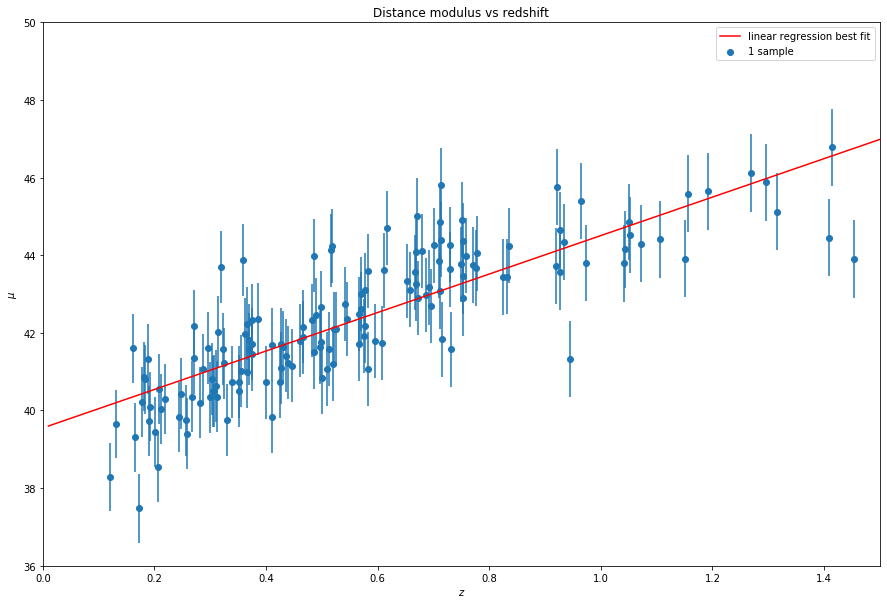

In [11]:
# z = np.linspace(0.01, 1.5, 1000)
z = np.linspace(0.01, 1.5, 150)
plot_dist_mod()
# YOUR CODE HERE
theta = compute_theta_lin_reg(z_sample, mu_sample)
mu_pred_lin = predict_lin_reg(theta, z)
plt.plot(z, mu_pred_lin, "r-", label='linear regression best fit')
plt.legend()

In [12]:
check_var_defined('mu_pred_lin')
assert mu_pred_lin.shape == (len(z),)

mu_pred_lin defined.


Solve for the parameters $\theta$ using Scikit-Learn.

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# YOUR CODE HERE
z_sample_b = np.c_[np.ones((len(z_sample), 1)), z_sample] # add x0 = 1 to each instance
lin_reg.fit(z_sample_b, mu_sample)
# z_new = np.c_[np.ones((len(z), 1)), z] # add x0 = 1 to each instance
# lin_reg.predict(z_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print("Linear regression parameters recovered by scikit-learn: intercept={0:.4f}, slope={1:.4f}"
      .format(lin_reg.intercept_, lin_reg.coef_[0]))

Linear regression parameters recovered by scikit-learn: intercept=39.5505, slope=0.0000


Extend your model to include polynomial features up to degree 15 (using Scikit-Learn).  Use variable `lin_reg_poly` for your revised model.

In [15]:
degree = 15
bias = False
from sklearn.preprocessing import PolynomialFeatures
def compute_poly_features(degree, bias):
    # Return polynomial features of samples and class
    # YOUR CODE HERE
    poly_features = PolynomialFeatures(degree=degree, include_bias=bias)
    z_sample_poly = poly_features.fit_transform(z_sample.reshape(len(z_sample), 1))
    return z_sample_poly, poly_features
z_sample_poly, poly_features = compute_poly_features(degree, bias)
# Train model
# YOUR CODE HERE
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(z_sample_poly, mu_sample)
print("Linear regression polynomial parameters recovered by scikit-learn: intercept={0:.4f}, slope={1:.4f}"
      .format(lin_reg_poly.intercept_, lin_reg_poly.coef_[0]))

Linear regression polynomial parameters recovered by scikit-learn: intercept=-182.1637, slope=5281.4677


In [16]:
check_var_defined('lin_reg_poly')

lin_reg_poly defined.


Plot the data and the predictions of your models considered so far (linear and polynomial regression).  Call the variable used to store the predictions for your polynomial model `mu_pred_poly`.

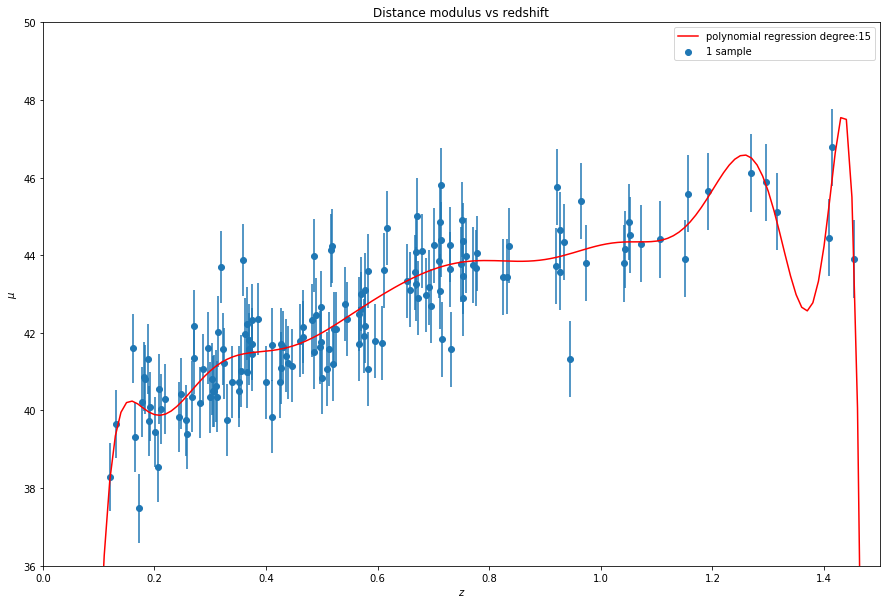

In [17]:
# YOUR CODE HERE
z_new = z.reshape(len(z), 1)
z_new_poly = poly_features.transform(z_new)
mu_pred_poly = lin_reg_poly.predict(z_new_poly)
plot_dist_mod()
plt.plot(z_new, mu_pred_poly, "r-", label='polynomial regression degree:' + str(degree))
plt.legend()

In [18]:
check_var_defined('mu_pred_poly')
assert mu_pred_poly.shape == (len(z),)

mu_pred_poly defined.


Comment on the accuracy of your models.

YOUR ANSWER HERE
___
> This model of degree 15 is not a good model to accurately model the data, as the training data is overfitted and so it will not generalize well for unseen data. This model takes into account a higher level of granularity of the data, and so this means that small changes in the data will reflect largely in the polynomial - this type of behaviour can be seen in the above plot for 1.2 < z < 1.4 where there are fewer data points, however the model is predicting the behaviour to drop and then increase again. This shows that the model is overfitted.
>
> Overfitting can also be inferred from the coefficients of the model, i.e. the intercept of this model of degree 15 is -182, which we know intuitively cannot be less than 0 as $ \mu $ is a distance modulus, and must be positive for all redshifts. The value of the slope is also extremely high in comparison to the linear regression model, which indicates a level of overfitting.
___

Improve your polynomial model and use the improved model to make predictions.  Call the variable used to store the predictions for your polynomial model `mu_pred_poly_improved`.

Linear regression polynomial parameters recovered by scikit-learn: intercept=38.1585, slope=0.0000


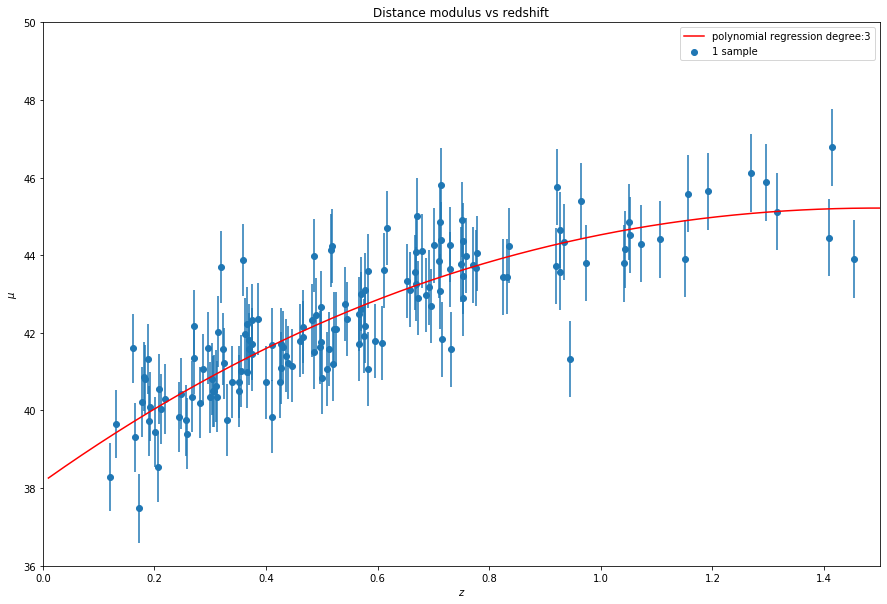

In [19]:
# YOUR CODE HERE

# try a polynomial of degree 3 & include the bias
bias = True
degree = 3
z_sample_poly, poly_features = compute_poly_features(degree, bias)
# Train model
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(z_sample_poly, mu_sample)
print("Linear regression polynomial parameters recovered by scikit-learn: intercept={0:.4f}, slope={1:.4f}"
      .format(lin_reg_poly.intercept_, lin_reg_poly.coef_[0]))
# plot the curve
z_new = z.reshape(len(z), 1)
z_new_poly = poly_features.transform(z_new)
mu_pred_poly_improved = lin_reg_poly.predict(z_new_poly)
plot_dist_mod()
plt.plot(z_new, mu_pred_poly_improved, "r-", label='polynomial regression degree:' + str(degree))
plt.legend()

In [20]:
check_var_defined('mu_pred_poly_improved')
assert mu_pred_poly_improved.shape == (len(z),)

mu_pred_poly_improved defined.


Plot the predictions made with new model and all previous models considered.

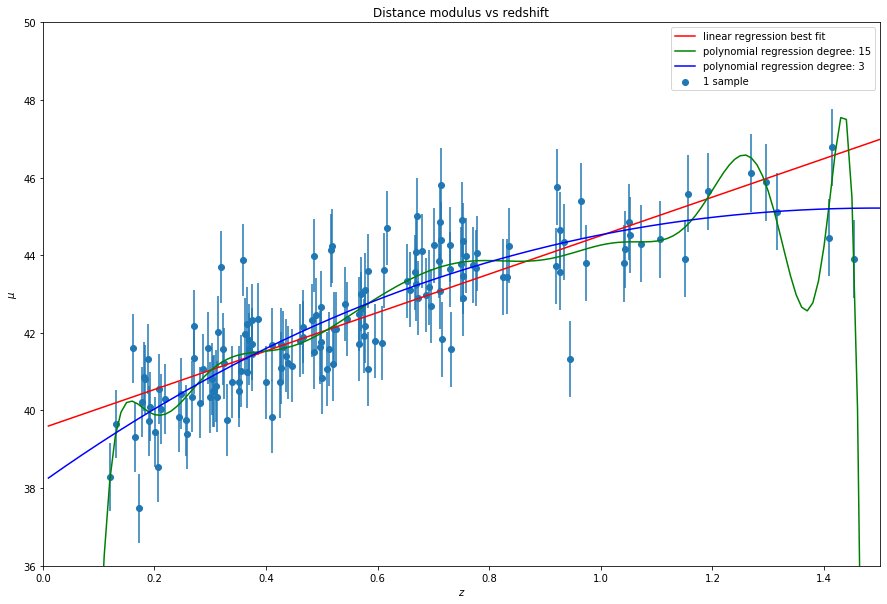

In [21]:
# YOUR CODE HERE

plot_dist_mod()
plt.plot(z, mu_pred_lin, "r-", label='linear regression best fit')
plt.plot(z_new, mu_pred_poly, "g-", label='polynomial regression degree: 15')
plt.plot(z_new, mu_pred_poly_improved, "b-", label='polynomial regression degree: 3')
plt.legend()

Compute the RMS error between your predictions and the *data samples*.

$$\text{E} \left[ \left(y - h(x)\right)^2 \right]
\text{Bias}^2\left[ h(x) \right] + \text{Var}\left[ h(x) \right] + \sigma^2$$

$$\text{Bias}[h(x)] = E[h(x) - f(x)] $$

$$\text{Var}[h(x)] = E[h^2(x)] - E[h(x)]^2$$

In [22]:
# Define a general function to compute the RMS error
from sklearn.metrics import mean_squared_error
def compute_rms(mu_1, mu_2):
    # YOUR CODE HERE
    rms = np.sqrt(mean_squared_error(mu_1, mu_2))
    return rms

In [23]:
assert np.isclose(compute_rms(mu_pred_lin, mu_pred_lin), 0.0)

In [24]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_sample_lin, rms_sample_poly and rms_sample_poly_improved.
# YOUR CODE HERE
rms_sample_lin = compute_rms(mu_sample, mu_pred_lin)
rms_sample_poly = compute_rms(mu_sample, mu_pred_poly)
rms_sample_poly_improved = compute_rms(mu_sample, mu_pred_poly_improved)

In [25]:
# Print RMS values computed.
print("rms_sample_lin = {0:.4f}".format(rms_sample_lin))
print("rms_sample_poly = {0:.4f}".format(rms_sample_poly))
print("rms_sample_poly_improved = {0:.4f}".format(rms_sample_poly_improved))

rms_sample_lin = 2.7600
rms_sample_poly = 24.7095
rms_sample_poly_improved = 2.6123


In [26]:
check_var_defined('rms_sample_lin')

rms_sample_lin defined.


In [27]:
check_var_defined('rms_sample_poly')

rms_sample_poly defined.


In [28]:
check_var_defined('rms_sample_poly_improved')

rms_sample_poly_improved defined.


Comment on what models you believe are best.

YOUR ANSWER HERE
___
> From Evaluating the rms error between linear fit, polynomial of degree 3 and polynomial of degree 15, we can see that the polynomial of degree 3 has the smallest rms error, therefore out of these models it is the best fit to model this redshift-distance data.
___

Using our cosmological concordance model we can predict the theoretical distance modulus vs redshift relationship using our understanding of the physics.

In [29]:
from astroML.cosmology import Cosmology
cosmo = Cosmology()
mu_cosmo = np.array(list(map(cosmo.mu, z)))

        Use astropy.cosmology instead. [warnings]


Plot the data, predictions made with all regression models, and the values predicted by the cosmological model.

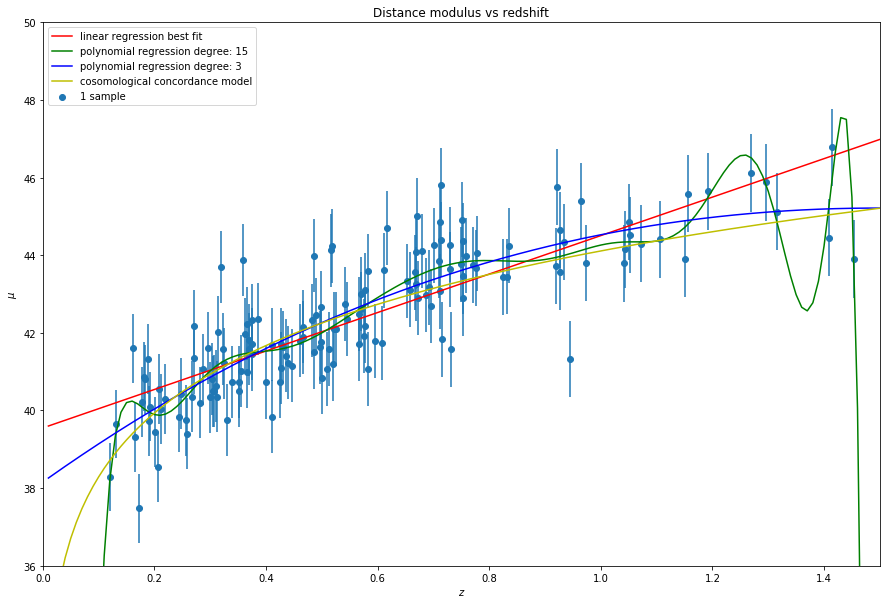

In [30]:
# YOUR CODE HERE

plot_dist_mod()
plt.plot(z, mu_pred_lin, "r-", label='linear regression best fit')
plt.plot(z_new, mu_pred_poly, "g-", label='polynomial regression degree: 15')
plt.plot(z_new, mu_pred_poly_improved, "b-", label='polynomial regression degree: 3')
plt.plot(z_new, mu_cosmo, "y-", label='cosomological concordance model')
plt.legend(loc='upper left')

Compute the RMS error between the predictions made by the cosmological model and each of the regression models, over the sample array `z`.

In [31]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_cosmo_lin, rms_cosmo_poly and rms_cosmo_poly_improved.
# YOUR CODE HERE
rms_cosmo_lin = compute_rms(mu_cosmo, mu_pred_lin)
rms_cosmo_poly = compute_rms(mu_cosmo, mu_pred_poly)
rms_cosmo_poly_improved = compute_rms(mu_cosmo, mu_pred_poly_improved)

In [32]:
# Print RMS values computed.
print("rms_cosmo_lin = {0:.4f}".format(rms_cosmo_lin))
print("rms_cosmo_poly = {0:.4f}".format(rms_cosmo_poly))
print("rms_cosmo_poly_improved = {0:.4f}".format(rms_cosmo_poly_improved))

rms_cosmo_lin = 1.1834
rms_cosmo_poly = 23.6258
rms_cosmo_poly_improved = 0.7126


In [33]:
check_var_defined('rms_cosmo_lin')

rms_cosmo_lin defined.


In [34]:
check_var_defined('rms_cosmo_poly')

rms_cosmo_poly defined.


In [35]:
check_var_defined('rms_cosmo_poly_improved')

rms_cosmo_poly_improved defined.


Comment on the RMS values computed and the implications for the accuracy of the different regression models considered.

YOUR ANSWER HERE
___
> The computed rms values give us an indication of how well the different regression models are in comparison to the cosmological concordance model. We can see that the polynomial of degree 15  has a large rms value, indicating that is is not a good model, compared to the cosmological model. The best model out of my regression model is the polynomial of degree 3, as it has the lowest rms in comparison to the cosmological concordance model.
___

---

## Part 2: Classification

In these exercises we will consider classification of [RR Lyrae](https://en.wikipedia.org/wiki/RR_Lyrae_variable) variable stars.  RR Lyrae variables are often used as standard candles to measure astronomical distances since their period of pulsation can be related to their absolute magnitude.

Observations of star magnitudes are made in each [SDSS filter band](http://skyserver.sdss.org/dr2/en/proj/advanced/color/sdssfilters.asp): u, g, r, i, z.

We will consider the space of astronomical "colours" to distinguish RR Lyraes from background stars.  Astronomical colours are simply differences in magnitudes between bands, e.g. u-g, g-r, r-i, i-z.  You can find further background [here](https://en.wikipedia.org/wiki/Color%E2%80%93color_diagram).

First, download the data.  (This may take some time on first execution.  Subsequently executions will read from cached data on your system.)

In [45]:
# Load data
from astroML.datasets import fetch_rrlyrae_combined
X, y = fetch_rrlyrae_combined()

You can learn more about the format of the returned data [here](http://www.astroml.org/modules/generated/astroML.datasets.fetch_rrlyrae_combined.html).  In particular, note that the columns of `X` are u-g, g-r, r-i, i-z.

Construct a Pandas DataFrame for the `X` data and a Series for the `y` data.  Call your Pandas objects `X_pd` and `y_pd` respectively.

Be sure to give your colums the correct colour name, e.g. 'u-g'.

In [46]:
import pandas as pd
cols=['u-g', 'g-r', 'r-i', 'i-z']
# YOUR CODE HERE
X_pd = pd.DataFrame(data=X, columns=cols)

In [47]:
check_var_defined('X_pd')
X_pd.head()

X_pd defined.


,u-g,g-r,r-i,i-z
0,1.250999,0.394000,0.137000,0.061999
1,1.048000,0.339001,0.151999,0.023001
2,1.008001,0.341999,0.129000,0.203001
3,0.965000,0.392000,0.149000,0.150000
4,1.040001,0.333000,0.125999,0.101999


In [48]:
# YOUR CODE HERE
y_pd = pd.Series(y)

In [49]:
check_var_defined('y_pd')
y_pd.head()

y_pd defined.


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

Combine your data and targets into a single Pandas DataFrame, labelling the target column 'target'.  Call the resulting Pandas DataFrame `X_pd_all`.

In [50]:
# YOUR CODE HERE
y_pd_series = y_pd.to_frame('target')
X_pd_all = pd.concat([X_pd, y_pd_series], axis=1, sort=False)

In [51]:
check_var_defined('X_pd_all')
X_pd_all.head()

X_pd_all defined.


,u-g,g-r,r-i,i-z,target
0,1.250999,0.394000,0.137000,0.061999,0.0
1,1.048000,0.339001,0.151999,0.023001,0.0
2,1.008001,0.341999,0.129000,0.203001,0.0
3,0.965000,0.392000,0.149000,0.150000,0.0
4,1.040001,0.333000,0.125999,0.101999,0.0


Add a 'target description' column to your existing `X_pd_all` DataFrame, with fields 'Background' and 'RR Lyrae' to specify the target type.

In [52]:
# YOUR CODE HERE
X_pd_all['target description'] = np.where(X_pd_all['target'] == 1, 'RR Lyrae', 'Background')

In [53]:
X_pd_all.head()

,u-g,g-r,r-i,i-z,target,target description
0,1.250999,0.394000,0.137000,0.061999,0.0,Background
1,1.048000,0.339001,0.151999,0.023001,0.0,Background
2,1.008001,0.341999,0.129000,0.203001,0.0,Background
3,0.965000,0.392000,0.149000,0.150000,0.0,Background
4,1.040001,0.333000,0.125999,0.101999,0.0,Background


In [54]:
X_pd_all.head()
X_pd_all.tail()

,u-g,g-r,r-i,i-z,target,target description
93136,0.962999,0.059000,-0.025999,-0.025000,1.0,RR Lyrae
93137,1.059999,0.185001,0.050999,-0.023998,1.0,RR Lyrae
93138,1.044001,0.212000,0.035000,0.002001,1.0,RR Lyrae
93139,1.064999,0.172001,0.042000,0.003000,1.0,RR Lyrae
93140,1.125999,0.065001,-0.017000,-0.057999,1.0,RR Lyrae


How many RR Lyrae variable stars are there in the dataset (i.e compute `n_rrlyrae`)?

In [70]:
# YOUR CODE HERE
n_rrlyrae = len(X_pd_all.loc[X_pd_all.target == 1])

In [71]:
check_var_defined('n_rrlyrae')
print("n_rrlyrae = {0}".format(n_rrlyrae))

n_rrlyrae defined.
n_rrlyrae = 483


How many background stars are there in the dataset (i.e. compute `n_background`)?

In [72]:
# YOUR CODE HERE
n_background = len(X_pd_all.loc[X_pd_all.target == 0])

In [73]:
check_var_defined('n_background')
print("n_background = {0}".format(n_background))

n_background defined.
n_background = 92658


Plot scatter plot pairs for all colour combinations using `seaborn`.  Colour the points by target type.

In [74]:
%matplotlib inline
import seaborn as sns; sns.set()

Text(0.5, 1.0, 'Pair-Plot for all colour combinations of RR Lyrae variable stars')

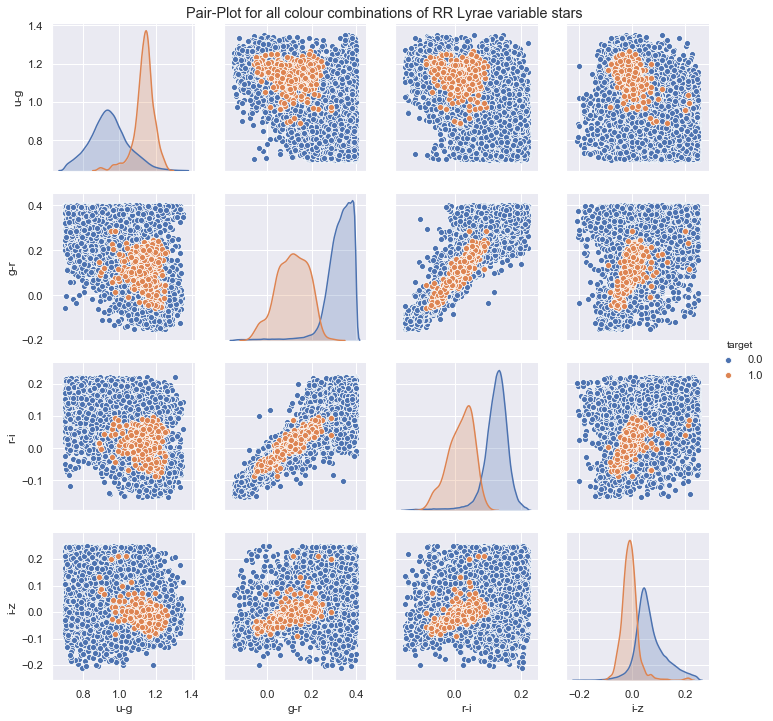

In [81]:
# YOUR CODE HERE
plot = sns.pairplot(X_pd_all, x_vars=cols, y_vars=cols, hue="target")
plot.fig.suptitle('Pair-Plot for all colour combinations of RR Lyrae variable stars', y=1.0)

Let's separate the data into training and test sets, keeping 25% of the data for testing.  

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

First let's consider 1D classification for the zeroth colour, i.e. $u-g$. 

In [83]:
ind = 0
col=cols[ind]
col

'u-g'

In [84]:
X_train_1d = X_train[:, ind]
X_train_1d = X_train_1d.reshape(-1,1)
X_test_1d = X_test[:, ind]
X_test_1d = X_test_1d.reshape(-1,1)

To get some further intuition about the 1D classiciation problem consider a 1D plot of
class against colour.

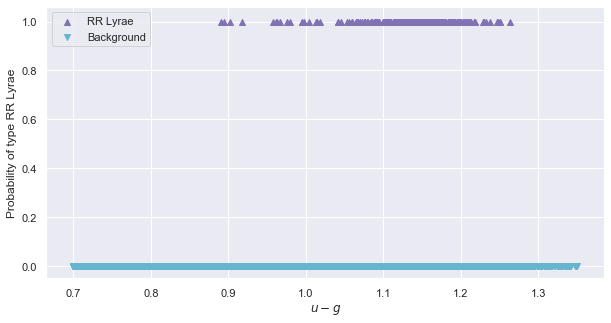

In [85]:
def plot_scatter():
    plt.figure(figsize=(10,5))
    plt.scatter(X_train_1d[y_train==1], y_train[y_train==1], c='m', marker='^', label='RR Lyrae')
    plt.scatter(X_train_1d[y_train==0], y_train[y_train==0], c='c', marker='v', label='Background')
    plt.xlabel('$' + col + '$')
    plt.ylabel('Probability of type RR Lyrae')
plot_scatter()    
plt.legend()

Given the plot shown above, comment on how well you expect logistic regression to perform.

YOUR ANSWER HERE

Where would you guess the decision bounary should lie?  Set the variable `decision_boundary_guess` to your guess.

In [104]:
# YOUR CODE HERE
decision_boundary_guess = 0.92

In [105]:
check_var_defined('decision_boundary_guess')
print("decision_boundary_guess = {0:.4f}".format(decision_boundary_guess))

decision_boundary_guess defined.
decision_boundary_guess = 0.9200


Use Scikit-Learn to perform logistic regression to classify the two classes for this 1D problem.

First, set the inverse regularation strength `C` such that regularisation is effecitvely not performed.

In [106]:
C = 1e10

Second, fit the model using Scikit-Learn. Use the variable `clf` for your classification model.

In [107]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train_1d, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
check_var_defined('clf')

clf defined.


Compute the decision boundary of the logistic regression model fitted by Scikit-Learn.  User variable `decision_boundary_sklearn` for your result.

(Ensure your result is a scalar and not an array of length 1.)

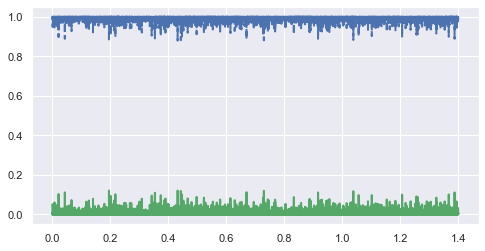

In [103]:
# YOUR CODE HERE
y_predict_proba = clf.predict_proba(X_test_1d)
plt.figure(figsize=(8,4))
X_1d_new = np.linspace(0, 1.4, len(X_test_1d)).reshape(-1, 1)
plt.plot(X_1d_new, y_predict_proba[:, 1], "g-", linewidth=2, label="RR Lyrae")
plt.plot(X_1d_new, y_predict_proba[:, 0], "b--", linewidth=2, label="Background")
# plt.xlabel("Petal width (cm)", fontsize=14)
# plt.ylabel("Probability", fontsize=14)
# plt.legend(loc="center left", fontsize=14)

In [110]:
y_predict_proba[:,1]
# X_1d_new

array([0.00292381, 0.00207729, 0.0071661 , ..., 0.00301071, 0.00262608,
       0.00207729])

In [ ]:
check_var_defined('decision_boundary_sklearn')
assert not hasattr(decision_boundary_sklearn, "__len__")
print("decision_boundary_sklearn = {0:.4f}".format(decision_boundary_sklearn))

Evaluate the probabilities prediced by your logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba` for your computed probabilities.

In [ ]:
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('y_1d_proba')

Plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously and the one computed by Scikit-Learn.

In [ ]:
plot_scatter()
# YOUR CODE HERE
raise NotImplementedError()

From inspection of your plot, how would all objects in the training set be classified?

YOUR ANSWER HERE

Use your logistic regression model fitted by Scikit-Learn to predict the class of all objects in the test set. User variable `y_test_1d_pred` to specify your answer.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('y_test_1d_pred')

How many objects are classified as of type RR Lyrae?  Use variable `n_rrlyrae_pred` to specify your answer.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('n_rrlyrae_pred')
assert n_rrlyrae_pred % 1 == 0 # check integer
print("n_rrlyrae_pred = {0}".format(n_rrlyrae_pred))

How many objects are classified as of type Background?  Use variable `n_background_pred` to specify your answer.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('n_background_pred')
assert n_background_pred % 1 == 0 # check integer
print("n_background_pred = {0}".format(n_background_pred))

Let's check the Scikit-Learn result by solving the logistic regression problem (without regularisation) manually.

Recall that the cost function for logistic regression is given by
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right],
$$


where

$$\hat{p} = \sigma(\theta^\text{T} x) = \frac{1}{1+\exp{(-\theta^\text{T} x)}}. $$

Show analytically that the derivative of the cost function is given by
$$\begin{eqnarray}
\frac{\partial C}{\partial \theta} 
&=& 
\frac{1}{m} \sum_{i=1}^m 
\left[ \sigma\left(\theta^{\rm T} x^{(i)} \right) - y^{(i)} \right]
x^{(i)}\\
&=&
\frac{1}{m} 
X^{\rm T}
\left[ \sigma\left(X \theta \right) - y \right]
\end{eqnarray}$$

(use latex mathematics expressions).

First, simplify the cost function terms $\log(\hat{p})$ and $\log(1-\hat{p})$ to express in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.

(You may drop $i$ superscripts for notational brevity.)

YOUR ANSWER HERE

Next, substitute these terms into the cost function and simplify to also express the cost function in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.

YOUR ANSWER HERE

Now compute the derivative of the cost function with respect to variable $\theta_j$, i.e. compute $\partial C / \partial \theta_j$.

YOUR ANSWER HERE

Combine terms for all $\theta_j$ to give the overall derivative with respect to $\theta$, i.e. $\partial C / \partial \theta$.

YOUR ANSWER HERE

Using the analytically expression for the derivative of the cost function, we will solve the logistic regression problem by implementing a gradient descent algorithm.

First, define the sigmoid function.

In [ ]:
def sigmoid(x):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert np.isclose(sigmoid(0), 0.5)

Next, extend the training data to account for a bias term in your model. Use variable `X_train_1d_b` to specify your result.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('X_train_1d_b')

Implement batch gradient descent to fit the parameters of your logistic regression model.  Consider `n_iterations = 40000` iterations and a learning rate of `alpha = 10.0`. Consider a starting point of $\theta_0 = (1, 1)$, i.e. `theta = np.array([[1], [1]])`. Use variable `theta` to specify your estimated parameters.

In [ ]:
n_iterations = 40000
alpha = 10.0
theta = np.array([[1], [1]])
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('theta')
print("theta[0] = {0:.4f}".format(theta[0][0]))
print("theta[1] = {0:.4f}".format(theta[1][0]))

Compute the difference between the logistic regression model intercept computed by Scikit-Learn and manually.  Use variable `intercept_diff` for your result.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('intercept_diff')
print("intercept_diff = {0:.4E}".format(intercept_diff))

Compute the difference between the logistic regression model *slope* (i.e. coefficient) computed by Scikit-Learn and manually.  Use variable `coeff_diff` for your result.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('coeff_diff')
print("coeff_diff = {0:.4E}".format(coeff_diff))

You should find that the solution from your gradient descent algorithm is close (although not identical) to that recovered by Scikit-Learn. 

Both fitted logistic regression models, however, are not effective. The reason for this is because of class imbalance.  Describe the class imbalance problem in your own words and how it manifests itself in the classification problem at hand.

YOUR ANSWER HERE

The class imbalance problem can be addressed by weighting the training data in a manner that is inversely proportional to their frequency.

Repeat the fitting of your linear regression model but this time perform class weighting.  Use variable `clf_balanced` for your new model.

See the `class_weight` argument of the Scikit-Learn [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier for further details on how to perform class weighting.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('clf_balanced')

Compute the decision boundary of the logistic regression model fitted by Scikit-Learn when weighting classes.  

(Ensure your result is a scalar and not an array of length 1.)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('decision_boundary_sklearn_balanced')
assert not hasattr(decision_boundary_sklearn_balanced, "__len__")
print("decision_boundary_sklearn_balanced = {0:.4f}".format(decision_boundary_sklearn_balanced))

Evaluate the probabilities prediced by your new logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba_balanced` for your computed probabilities.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('y_1d_proba_balanced')

For your new balanced model, plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously, the one computed by Scikit-Learn initially, and the one computed by Scikit-Learn for your new balanced model.

In [ ]:
plot_scatter()
# YOUR CODE HERE
raise NotImplementedError()

Comment on the decision boundary of the balanced model compared to the unbalanced models fitted previously.

YOUR ANSWER HERE

Now that we've built up good intuition surrounding the subtleties of the classification problem at hand in 1D, let's consider the 2D problem (we will keep to 2D for plotting convenience).

For the 2D case we consider the following colours.

In [ ]:
ind = 1
cols[:ind+1]

Consider the following training and test data for the 2D problem.

In [ ]:
X_train_2d = X_train[:, :ind+1]
X_train_2d = X_train_2d.reshape(-1,ind+1)
X_test_2d = X_test[:, :ind+1]
X_test_2d = X_test_2d.reshape(-1,ind+1)

Train a logistic regression model for this 2D problem.  Use variable `clf_2d_logistic` for your classifier.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('clf_2d_logistic')

Compute the precision and recall of your 2D logistic regression model. Use variables `precision_logistic` and `recall_logistic` for your results.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('precision_logistic')
print("precision_logistic = {0:.6f}".format(precision_logistic))

In [ ]:
check_var_defined('recall_logistic')
print("recall_logistic = {0:.6f}".format(recall_logistic))

Consider the following meshgrid defining the u-g and g-r colour domain of interest.

In [ ]:
xlim = (0.7, 1.45)  # u-g
ylim = (-0.15, 0.4) # g-r
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

Over the domain specified above plot the predicted classification probability.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Now train an SVM classifier that can support a non-linear decision boundary on the same problem.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Replicate for the SVM your plot above for the 2D logistic regression model.  Over the domain specified above plot the decision function score.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Compute the precision and recall of your 2D SVM model. Use variables `precision_svm` and `recall_svm` for your results.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('precision_svm')
print("precision_svm = {0:.6f}".format(precision_svm))

In [ ]:
check_var_defined('recall_svm')
print("recall_svm = {0:.6f}".format(recall_svm))

Comment on the difference in decision boundary between your logistic regression and SVM models and how this impacts the effectiveness of the models.

YOUR ANSWER HERE